# EMA EV Test - connect Larger Vensim Model

* and test out some scenario discovery visualisations

In [1]:
# check library versions
import ema_workbench, numpy as np, sys
print("EMA version:", ema_workbench.__version__)
print("EMA path   :", ema_workbench.__file__)
print("NumPy      :", np.__version__)
print(sys.executable)

EMA version: 2.5.3
EMA path   : c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\__init__.py
NumPy      : 2.3.3
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\python.exe


In [13]:
# Import necessary libraries
from ema_workbench import (
    RealParameter,
    IntegerParameter,
    CategoricalParameter,
    TimeSeriesOutcome,
    ema_logging,
    perform_experiments,
)
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench import save_results, load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import plotting

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Fix for older numpy versions that do not have np.NAN
import numpy as np
if not hasattr(np, "NAN"):
    np.NAN = np.nan

# set up troubleshooting logging
#from ema_workbench.util import ema_logging
#ema_logging.log_to_stderr(ema_logging.DEBUG)

In [14]:
# Set up and run the experiments
if __name__ == "__main__": 
    # turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO) 

    # instantiate a model
    wd = "./model_files/" # adjust this path to load different version of model
    vensim_model = VensimModel("evmodel", wd=wd, model_file="14_10_einde_dag.vpmx") 
    # 24_09 Carageing_emissions_utility.vmpx # 14_10-1525.vpmx
    vensim_model.uncertainties = [

        # Initial number of cars
        IntegerParameter("initial cars 0-5[FossilVehicle]", 8000, 12000),
        IntegerParameter("initial cars 0-5[ElectricVehicle]", 1000, 1500),

        IntegerParameter("initial cars 5-10[FossilVehicle]", 9000, 13000),
        IntegerParameter("initial cars 5-10[ElectricVehicle]", 500, 1000),

        IntegerParameter("initial cars 10-15[FossilVehicle]", 9000, 12000),
        IntegerParameter("initial cars 10-15[ElectricVehicle]", 200, 500),

        IntegerParameter("initial cars 15-20[FossilVehicle]", 8000, 11000),
        IntegerParameter("initial cars 15-20[ElectricVehicle]", 0, 5),

        IntegerParameter("initial cars >20[FossilVehicle]", 10000, 13000),
        IntegerParameter("initial cars >20[ElectricVehicle]", 5, 10),
    ]

    vensim_model.outcomes = [
        TimeSeriesOutcome("Number of EVs"),
        TimeSeriesOutcome("Total CO2 emissions cars[FossilVehicle]"),
        ]

    results = perform_experiments(vensim_model, 100)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments

[MainProcess/INFO] performing experiments sequentially
[MainProcess/WARNING] variable: 'initial cars 0-5[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 0-5[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 5-10[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 5-10[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 10-15[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 10-15[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 15-20[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 15-20[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars >20[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars >20[ElectricVehicle]' not found


[MainProcess/WARNING] variable: 'initial cars 0-5[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 0-5[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 5-10[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 5-10[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 10-15[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 10-15[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 15-20[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 15-20[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars >20[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars >20[ElectricVehicle]' not found

[MainProcess/WARNING] variable: 'initial cars 0-5[FossilVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 0-5[ElectricVehicle]' not found
[MainProcess/WARNING] variable: 'initial cars 5-10[FossilVehicle]

In [15]:
# split results into experiments and outcomes
experiments, outcomes = results

#### Save/load results

In [ ]:
# Save results  
save_results(results, "./results/ev_results.tar.gz")

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\em_framework\outcomes.py:541: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


In [11]:
# Load results
experiments, outcomes = load_results("./results/ev_results.tar.gz")

[MainProcess/INFO] results loaded successfully from c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


In [16]:
outcomes

{'TIME': array([[2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ],
        [2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ],
        [2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ],
        ...,
        [2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ],
        [2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ],
        [2020.    , 2020.0156, 2020.0312, ..., 2049.9688, 2049.9844,
         2050.    ]], shape=(100, 1921), dtype=float32),
 'Number of EVs': array([[2105.    , 2106.4006, 2107.7988, ..., 8144.267 , 8151.4883,
         8158.713 ],
        [2105.    , 2106.4006, 2107.7988, ..., 8144.267 , 8151.4883,
         8158.713 ],
        [2105.    , 2106.4006, 2107.7988, ..., 8144.267 , 8151.4883,
         8158.713 ],
        ...,
        [2105.    , 2106.4006, 2107.7988, ..., 8144.267 , 8151.4883,
         8158.713 ],
        [2105

### Pairplot

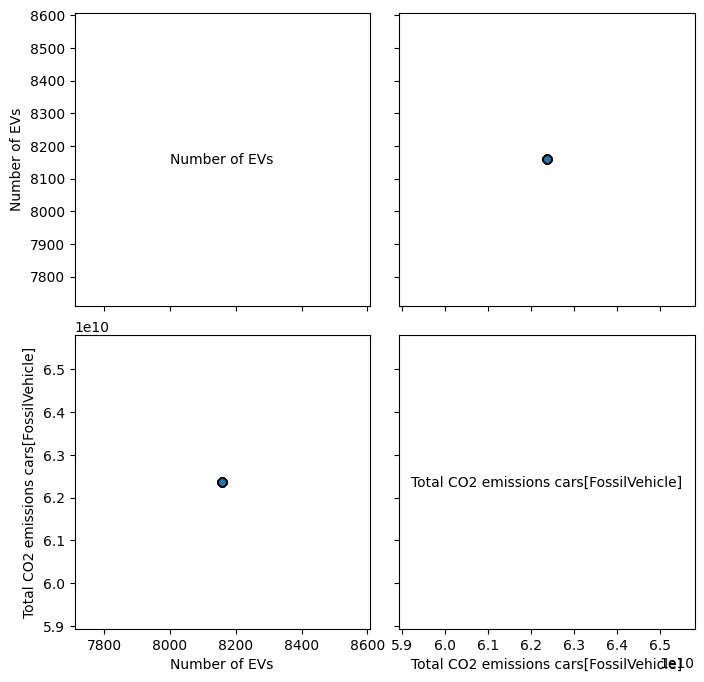

In [17]:
fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, legend=False
)
fig.set_size_inches(8, 8)
plt.show()

### Patient-Rule Induction Method (PRIM)

In [14]:
# use PRIM to find scenarios with less than 10,000 EVs after 30 years
x = experiments
y = outcomes["Number of EVs"].mean(axis=1) < 10000
print(type(y), y.shape, y.dtype)
print(y[:10])

<class 'numpy.ndarray'> (1000,) bool
[False False False False False False False False False False]


In [ ]:
# TO BE FIXED!!!
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

AttributeError: module 'ema_workbench.analysis.prim' has no attribute 'RuleInductionType'

### Feature Scoring

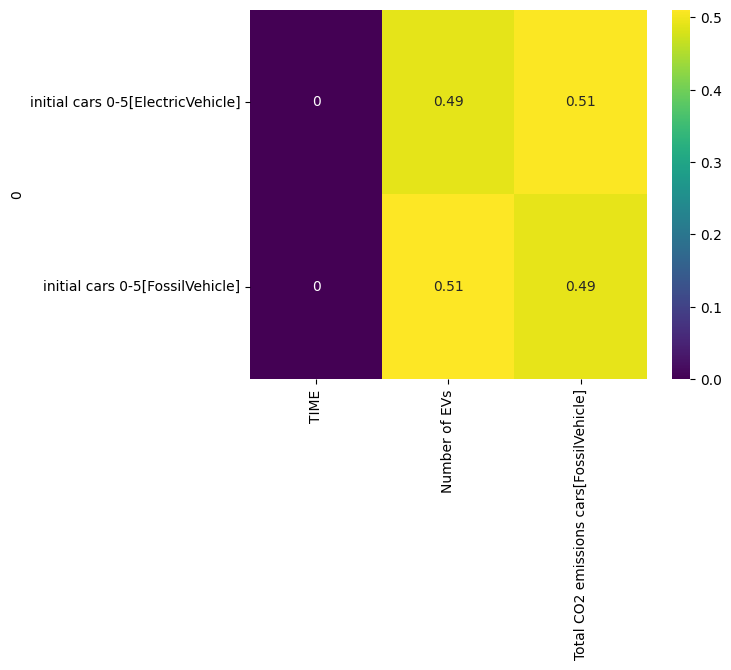

In [8]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

### Plotting Line Graphs

(<Figure size 640x480 with 2 Axes>,
 {'Number of EVs': <Axes: title={'center': 'Number of EVs'}, xlabel='Time', ylabel='Number of EVs'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: title={'center': 'Total CO2 emissions cars[FossilVehicle]'}, xlabel='Time', ylabel='Total CO2 emissions cars[FossilVehicle]'>})

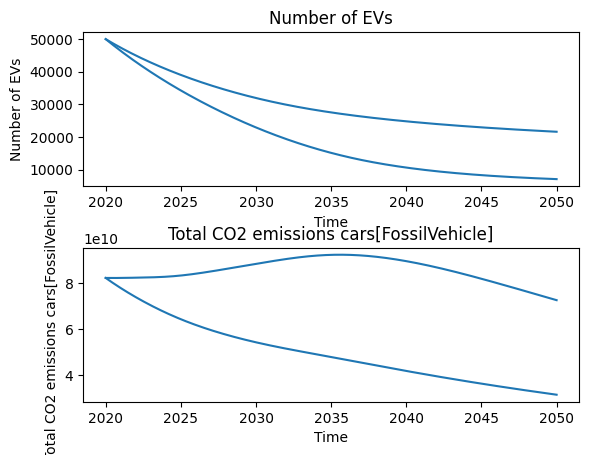

In [ ]:
# envelope plot
plotting.envelopes(experiments, outcomes,
                    outcomes_to_show=None, 
                    group_by=None, grouping_specifiers=None, 
                    density=None, fill=False, legend=True, 
                    titles={}, ylabels={}, log=False)



c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\plotting_util.py:369: RuntimeWarning: invalid value encountered in divide
  kde_x = kde_x / np.max(kde_x)


(<Figure size 640x480 with 4 Axes>,
 {'Number of EVs': <Axes: xlabel='time', ylabel='Number of EVs'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: xlabel='time', ylabel='Total CO2 emissions cars[FossilVehicle]'>})

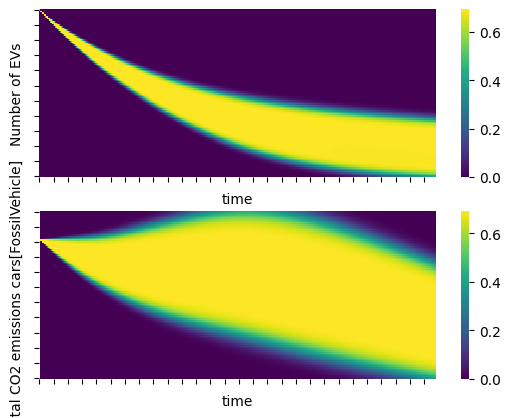

In [ ]:
# KDE over time (30 seconds to run)
plotting.kde_over_time(experiments, outcomes, 
                       outcomes_to_show=None, 
                       group_by=None, grouping_specifiers=None, 
                       colormap='viridis', log=True)

(<Figure size 640x480 with 2 Axes>,
 {'Number of EVs': <Axes: xlabel='Time'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: xlabel='Time'>})

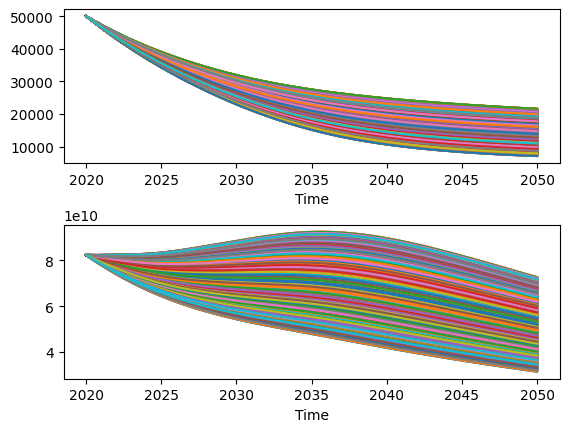

In [ ]:
# plotting all lines
plotting.lines(experiments, outcomes, 
               outcomes_to_show=None, group_by=None, 
               grouping_specifiers=None, density='', 
               legend=True, titles=None, ylabels=None, 
               experiments_to_show=None, show_envelope=False, log=False)

([<Figure size 640x480 with 3 Axes>, <Figure size 640x480 with 3 Axes>],
 {'Number of EVs': {'main plot': <Axes: title={'center': 'Number of EVs'}, xlabel='Time', ylabel='Number of EVs'>,
   'density_0': <Axes: >,
   'density_1': <Axes: >},
  'Total CO2 emissions cars[FossilVehicle]': {'main plot': <Axes: title={'center': 'Total CO2 emissions cars[FossilVehicle]'}, xlabel='Time', ylabel='Total CO2 emissions cars[FossilVehicle]'>,
   'density_0': <Axes: >,
   'density_1': <Axes: >}})

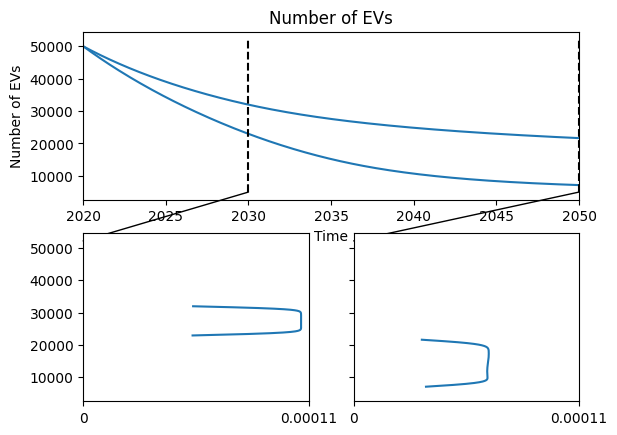

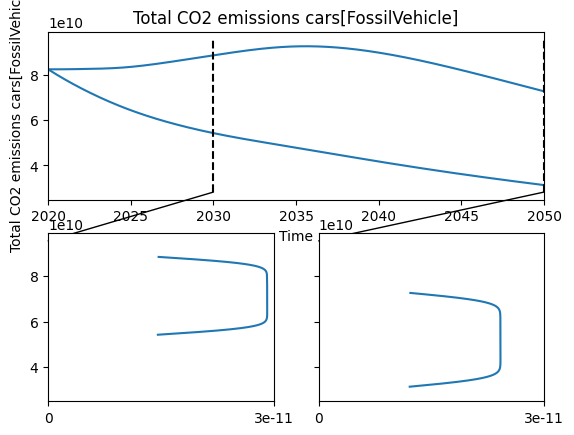

In [ ]:
# envelope plot with multiple densities
plotting.multiple_densities(experiments, outcomes, 
                            points_in_time=[2030, 2050], outcomes_to_show=None, 
                            group_by=None, grouping_specifiers=None, 
                            )